In [ ]:
import os

# Create folders
os.makedirs('data', exist_ok=True)
os.makedirs('notebooks', exist_ok=True)
os.makedirs('src', exist_ok=True)
os.makedirs('outputs', exist_ok=True)

print("✅ Project folders created.")


✅ Project folders created.


In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load your dataset
# Change filename if needed!
df = pd.read_csv(r'F:\master project\diabetes_012_health_indicators_BRFSS2015.csv')

# Preview data
df.head(10)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [ ]:
# Shape
print("Shape:", df.shape)

# Missing values
print(df.isnull().sum())

# Data types
print(df.dtypes)

# Class balance
df['Diabetes_012'].value_counts(normalize=True)


Shape: (253680, 22)
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthca

Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64

In [ ]:
# Remove duplicates (good practice even if rare) no missing values but 
df_cleaned = df.drop_duplicates()

print("✅ Cleaned data shape:", df_cleaned.shape)


✅ Cleaned data shape: (229781, 22)


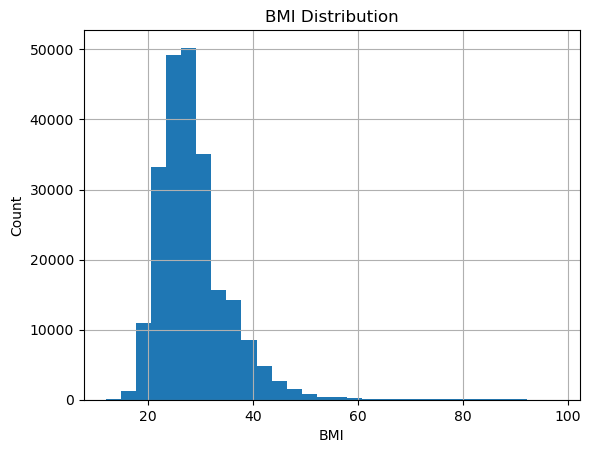

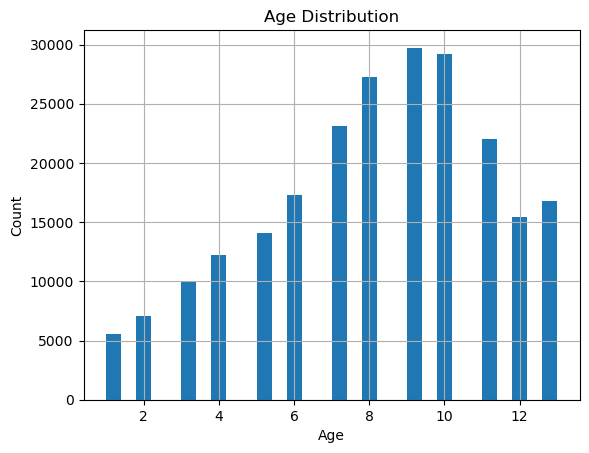

In [ ]:
# BMI distribution
df_cleaned['BMI'].hist(bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

# Age distribution
df_cleaned['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [ ]:
# X = all columns except target
X = df_cleaned.drop(columns=['Diabetes_012'])

# y = target column
y = df_cleaned['Diabetes_012']

# Split into Train and Test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Train shape:", X_train.shape)
print("✅ Test shape:", X_test.shape)


✅ Train shape: (183824, 21)
✅ Test shape: (45957, 21)


c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with 


🔹 Logistic Regression Accuracy: 0.8330613399482124
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     38012
         1.0       0.00      0.00      0.00       926
         2.0       0.54      0.17      0.26      7019

    accuracy                           0.83     45957
   macro avg       0.46      0.38      0.39     45957
weighted avg       0.78      0.83      0.79     45957



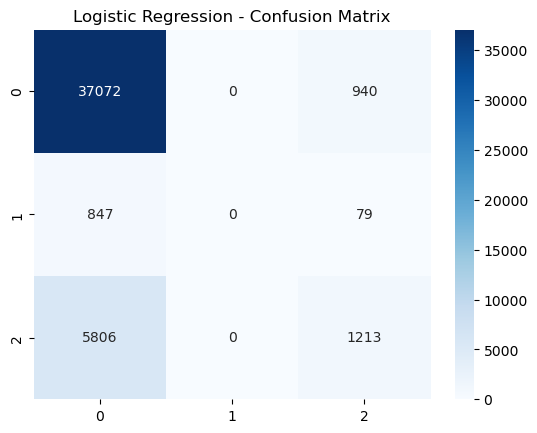


🔹 Random Forest Accuracy: 0.8240311595621994
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     38012
         1.0       0.00      0.00      0.00       926
         2.0       0.47      0.19      0.27      7019

    accuracy                           0.82     45957
   macro avg       0.44      0.38      0.39     45957
weighted avg       0.77      0.82      0.79     45957



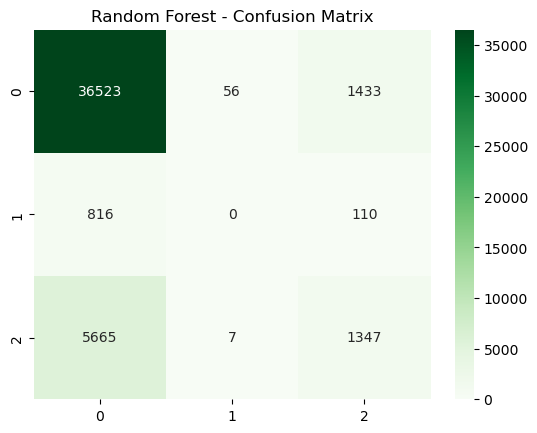

c:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:13:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔹 XGBoost Accuracy: 0.8365428552777596
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     38012
         1.0       0.00      0.00      0.00       926
         2.0       0.57      0.20      0.30      7019

    accuracy                           0.84     45957
   macro avg       0.47      0.39      0.40     45957
weighted avg       0.79      0.84      0.80     45957



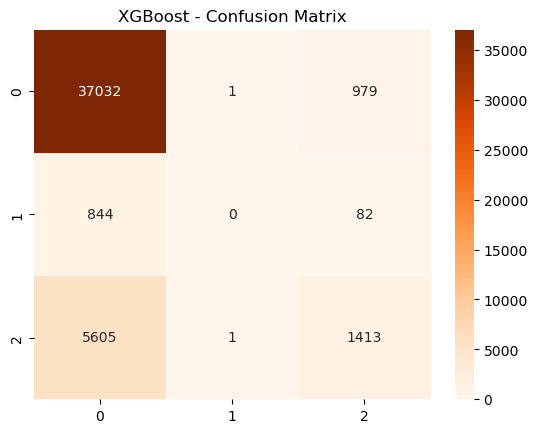


✅ Model Comparison:
Logistic Regression: 0.8331
Random Forest: 0.8240
XGBoost: 0.8365


In [ ]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dictionary to store results
results = {}

### 1️⃣ Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
acc_logistic = accuracy_score(y_test, y_pred_logistic)
results['Logistic Regression'] = acc_logistic

print("\n🔹 Logistic Regression Accuracy:", acc_logistic)
print(classification_report(y_test, y_pred_logistic))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

### 2️⃣ Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
results['Random Forest'] = acc_rf

print("\n🔹 Random Forest Accuracy:", acc_rf)
print(classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest - Confusion Matrix')
plt.show()

### 3️⃣ XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
results['XGBoost'] = acc_xgb

print("\n🔹 XGBoost Accuracy:", acc_xgb)
print(classification_report(y_test, y_pred_xgb))

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Oranges')
plt.title('XGBoost - Confusion Matrix')
plt.show()

### 4️⃣ Summary of all models
print("\n✅ Model Comparison:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")


C:\Users\user\AppData\Local\Temp\ipykernel_16592\2504319836.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


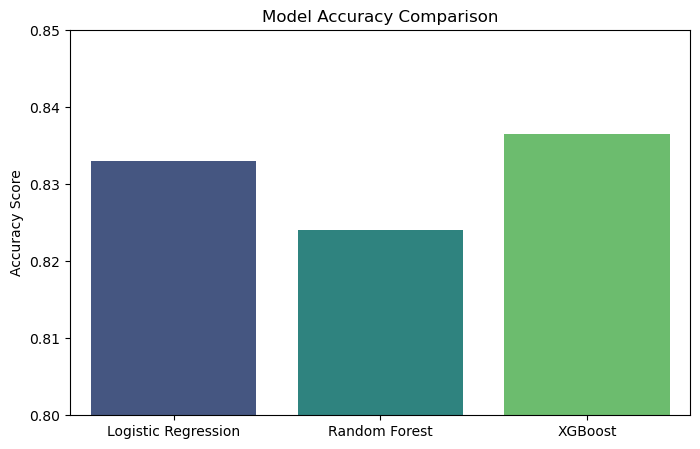

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visual comparison of model accuracy
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0.80, 0.85)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_csv(r'F:\master project\diabetes_012_health_indicators_BRFSS2015.csv')
# Map the target variable to readable labels
df['DiabetesStatus'] = df['Diabetes_012'].map({
    0: 'No Diabetes',
    1: 'Prediabetes',
    2: 'Diabetes'
})

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='DiabetesStatus', palette='Set2')

# Add labels and title
plt.title('Figure 1: Distribution of Diabetes Status (Target Variable)', fontsize=14)
plt.xlabel('Diabetes Status', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)

# Add percentage labels on bars
total = len(df)
for p in plt.gca().patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    plt.gca().annotate(percentage, (p.get_x() + p.get_width() / 2., count),
                       ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/diabetes_012_health_indicators_BRFSS2015.csv'

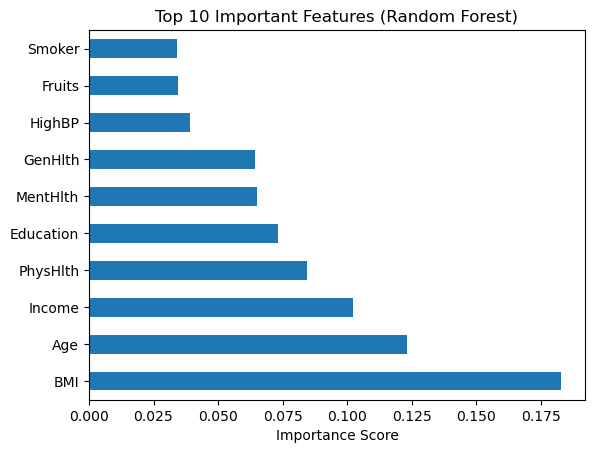

In [ ]:
# Feature importance (for Random Forest)
import pandas as pd

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', title='Top 10 Important Features (Random Forest)')
plt.xlabel('Importance Score')
plt.show()



In [ ]:
xgb_model.get_booster().feature_names = list(X.columns)
xgb_model.feature_importances_  # or use built-in plot


array([0.44804466, 0.09056863, 0.04221297, 0.02958175, 0.0101911 ,
       0.01370774, 0.02578587, 0.01004265, 0.00989466, 0.0108076 ,
       0.04146104, 0.01058679, 0.01103678, 0.1219659 , 0.01078534,
       0.01071827, 0.02293569, 0.02038024, 0.03462242, 0.01086091,
       0.01380904], dtype=float32)

In [ ]:
import joblib
joblib.dump(xgb_model, 'outputs/xgb_diabetes_model.pkl')



['outputs/xgb_diabetes_model.pkl']

In [ ]:
# Import
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import roc_auc_score

# Example for Random Forest
y_probs_rf = rf_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_probs_rf, multi_class='ovr')
print("Random Forest ROC AUC Score:", roc_auc)


Random Forest ROC AUC Score: 0.7176205125119761


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)


Best Params: {'max_depth': 10, 'n_estimators': 100}


100%|===================| 137856/137871 [46:57<00:00]        

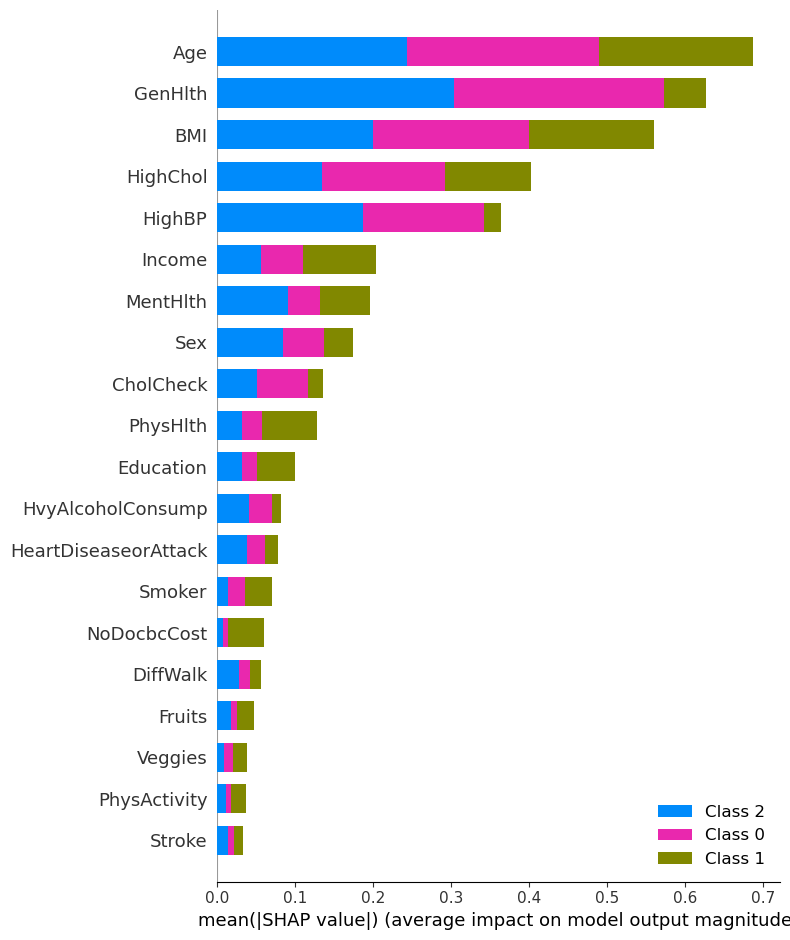

In [ ]:
import shap

explainer = shap.Explainer(xgb_model, X_test)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


In [2]:
# Get inputs from user
age = int(input("Enter your age (e.g., 45): "))
bmi = float(input("Enter your BMI (e.g., 24.5): "))
high_bp = int(input("Do you have high blood pressure? (1 = Yes, 0 = No): "))
high_chol = int(input("Do you have high cholesterol? (1 = Yes, 0 = No): "))
income = int(input("Enter your income level (1 = Low, 8 = High): "))


✅ Model trained and saved!

📝 Please answer the following questions:


c:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



🎯 Prediction: No Diabetes


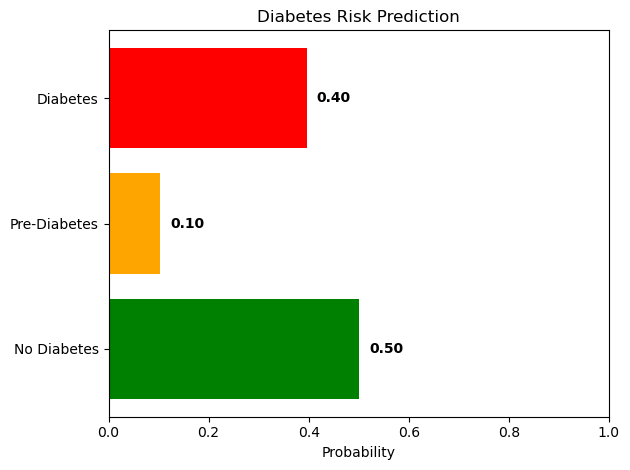

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
import matplotlib.pyplot as plt

# Step 1: Load dataset
df = pd.read_csv(r'F:\master project\diabetes_012_health_indicators_BRFSS2015.csv')

# Step 2: Clean data
df_cleaned = df.dropna()

# Step 3: Select features
features = ['Age', 'BMI', 'HighBP', 'HighChol', 'Income']
target = 'Diabetes_012'
X = df_cleaned[features]
y = df_cleaned[target]

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 5: Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Save model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("✅ Model trained and saved!")

# Step 7: Load model
with open('rf_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Step 8: Get user input
print("\n📝 Please answer the following questions:")
age = int(input("📍 Age (e.g., 45): "))
bmi = float(input("📍 BMI (e.g., 24.5): "))
high_bp = int(input("📍 High blood pressure? (1 = Yes, 0 = No): "))
high_chol = int(input("📍 High cholesterol? (1 = Yes, 0 = No): "))
income = int(input("📍 Income level (1 to 8): "))

# Step 9: Predict
user_input = np.array([[age, bmi, high_bp, high_chol, income]])
prediction = int(model.predict(user_input)[0])  # Convert to int here ✅
probs = model.predict_proba(user_input)[0]

# Step 10: Result
labels = ['No Diabetes', 'Pre-Diabetes', 'Diabetes']
print(f"\n🎯 Prediction: {labels[prediction]}")

# Step 11: Horizontal probability graph
plt.barh(labels, probs, color=['green', 'orange', 'red'])
plt.title('Diabetes Risk Prediction')
plt.xlabel('Probability')
plt.xlim(0, 1)
for i, v in enumerate(probs):
    plt.text(v + 0.02, i, f"{v:.2f}", va='center', fontweight='bold')
plt.tight_layout()
plt.show()
